# Just Run All! 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Import data
Note: please put train.csv and test.csv into the same directory as this iPython file

Suggestion: 

Perhaps can use scikit learn to port over our data pre-processing into python? 

In [4]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [5]:
train_dataset.tail()

,T+8,T+0,T-1_T-4_DIFF_MEAN,T-9_T-12_DIFF_MEAN,T-1_T-4_DIFF_DIFF_MEAN,T-1_T-4_MEAN,T-5_T-8_MEAN,T-9_T-12_MEAN,POPULATION,RAIN_2_MAX,...,TEMP_2_-8_-12_MIN,TEMP_2_-8_-12_MEAN,TEMP_3_-4_-7_MIN,TEMP_3_-4_-7_MEAN,TEMP_3_-8_-12_MIN,TEMP_3_-8_-12_MEAN,TEMP_4_-4_-7_MIN,TEMP_4_-4_-7_MEAN,TEMP_4_-8_-12_MIN,TEMP_4_-8_-12_MEAN
320,-0.168397,-0.141869,0.006151,0.009227,-0.004614,-0.161476,-0.133506,-0.140427,0.312796,0.306902,...,-0.072614,0.080083,0.141365,0.226737,-0.180771,-0.027350,0.143312,0.228186,-0.179630,-0.027677
321,-0.155709,-0.124567,0.004998,0.009612,0.008651,-0.153691,-0.148789,-0.129469,0.312996,0.306902,...,-0.116183,0.052282,-0.028383,0.184300,-0.180771,-0.006103,-0.025794,0.185909,-0.179630,-0.005890
322,-0.141869,-0.104960,0.012303,0.002691,0.005190,-0.145617,-0.155709,-0.126586,0.313939,0.306902,...,-0.184647,0.029876,-0.141916,0.075416,-0.180771,0.055756,-0.141782,0.077532,-0.179630,0.056997
323,-0.158016,-0.122261,0.016532,-0.007305,0.003460,-0.131488,-0.158593,-0.129758,0.315006,0.420707,...,-0.184647,0.019087,-0.141916,0.114309,-0.180771,0.095254,-0.141782,0.115891,-0.179630,0.096737
324,-0.155709,-0.138408,0.006536,-0.010381,-0.017301,-0.123414,-0.161476,-0.133506,0.316072,0.420707,...,-0.184647,-0.079668,-0.141916,0.058524,-0.033744,0.174641,-0.141782,0.059241,-0.026822,0.177184


In [6]:
# split features from labels 
# label = T=8
train_labels = train_dataset.pop('T+8')
test_labels = test_dataset.pop('T+8')

In [7]:
#def norm(x):
#  return (x - train_stats['mean']) / train_stats['std']
#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)

# note that this data is cleaned by MOPIKO, so it's alr normalized
normed_train_data = train_dataset
normed_test_data = test_dataset

In [8]:
train_dataset.tail()

,T+0,T-1_T-4_DIFF_MEAN,T-9_T-12_DIFF_MEAN,T-1_T-4_DIFF_DIFF_MEAN,T-1_T-4_MEAN,T-5_T-8_MEAN,T-9_T-12_MEAN,POPULATION,RAIN_2_MAX,RAIN_2_MEAN,...,TEMP_2_-8_-12_MIN,TEMP_2_-8_-12_MEAN,TEMP_3_-4_-7_MIN,TEMP_3_-4_-7_MEAN,TEMP_3_-8_-12_MIN,TEMP_3_-8_-12_MEAN,TEMP_4_-4_-7_MIN,TEMP_4_-4_-7_MEAN,TEMP_4_-8_-12_MIN,TEMP_4_-8_-12_MEAN
320,-0.141869,0.006151,0.009227,-0.004614,-0.161476,-0.133506,-0.140427,0.312796,0.306902,0.046323,...,-0.072614,0.080083,0.141365,0.226737,-0.180771,-0.027350,0.143312,0.228186,-0.179630,-0.027677
321,-0.124567,0.004998,0.009612,0.008651,-0.153691,-0.148789,-0.129469,0.312996,0.306902,0.049712,...,-0.116183,0.052282,-0.028383,0.184300,-0.180771,-0.006103,-0.025794,0.185909,-0.179630,-0.005890
322,-0.104960,0.012303,0.002691,0.005190,-0.145617,-0.155709,-0.126586,0.313939,0.306902,0.127465,...,-0.184647,0.029876,-0.141916,0.075416,-0.180771,0.055756,-0.141782,0.077532,-0.179630,0.056997
323,-0.122261,0.016532,-0.007305,0.003460,-0.131488,-0.158593,-0.129758,0.315006,0.420707,0.155916,...,-0.184647,0.019087,-0.141916,0.114309,-0.180771,0.095254,-0.141782,0.115891,-0.179630,0.096737
324,-0.138408,0.006536,-0.010381,-0.017301,-0.123414,-0.161476,-0.133506,0.316072,0.420707,0.139071,...,-0.184647,-0.079668,-0.141916,0.058524,-0.033744,0.174641,-0.141782,0.059241,-0.026822,0.177184


In [9]:
train_labels

0     -0.129181
1     -0.115340
2     -0.124567
3     -0.130334
4     -0.140715
         ...   
320   -0.168397
321   -0.155709
322   -0.141869
323   -0.158016
324   -0.155709
Name: T+8, Length: 325, dtype: float64

# Building the model


## Loss
This defines the Loss function. 
Keras only accepts yTrue (T+8) and yPredicted (predicted T+8 by model) as arguments. 
We cannot implement the MSE(yPredicted + Persistence, yTrue) as the Loss like autocaffe. 

In [10]:
# custom RMSE? 
def customLoss(yTrue,yPred):
    return keras.backend.sqrt(keras.backend.mean(keras.backend.square(yPred - yTrue))) 


## Model Network Definition
This section is the model building. 
This is a very naive and simple model. 
Suggestions: 
- perhaps we can build an LSTM network from keras docs? I'm not sure how to do it 

In [24]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=[len(train_dataset.keys())]),
    layers.Dense(42, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

  # optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.99, beta_2=0.999, epsilon=0, amsgrad=False)
  
    
  model.compile(loss=customLoss,
                optimizer='Adam',
                metrics=['mae', 'mse'])
  return model

Uncomment below to get early stopping, although I just observe the test loss graph and adjust the EPOCH accordingly

In [25]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# early_history = model.fit(normed_train_data, train_labels, 
#                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
#                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

## Early Model Check 
This segment checks if model can be trained on a sequence of 10 instances - to see if the model is functional without running the full training. 

In [26]:
# testing out the model

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
    
example_result    

array([[0.29333812],
       [0.29219186],
       [0.29348987],
       [0.28795642],
       [0.28731784],
       [0.29193953],
       [0.29222488],
       [0.25901955],
       [0.2683805 ],
       [0.2673048 ]], dtype=float32)

# Actual Training

In [27]:
EPOCHS = 500 # this sets how many repeats to train sequentially 

history = model.fit(normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.15, verbose=0,
  # callbacks=[early_stop, tfdocs.modeling.EpochDots()]) # this section includes the early stop 
    callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:0.2169,  mae:0.1715,  mse:0.0483,  val_loss:0.2589,  val_mae:0.2584,  val_mse:0.0670,  
....................................................................................................
Epoch: 100, loss:0.0975,  mae:0.0751,  mse:0.0100,  val_loss:0.0496,  val_mae:0.0386,  val_mse:0.0025,  
....................................................................................................
Epoch: 200, loss:0.0657,  mae:0.0502,  mse:0.0045,  val_loss:0.0432,  val_mae:0.0382,  val_mse:0.0019,  
....................................................................................................
Epoch: 300, loss:0.0632,  mae:0.0494,  mse:0.0041,  val_loss:0.0600,  val_mae:0.0514,  val_mse:0.0036,  
....................................................................................................
Epoch: 400, loss:0.0477,  mae:0.0354,  mse:0.0023,  val_loss:0.0644,  val_mae:0.0557,  val_mse:0.0042,  
........................................................................

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.041666,0.031311,0.001787,0.062786,0.055392,0.003944,495
496,0.042580,0.032633,0.001857,0.064195,0.053779,0.004134,496
497,0.043121,0.032858,0.001900,0.074309,0.063008,0.005577,497
498,0.043244,0.033070,0.001906,0.058769,0.050003,0.003459,498
499,0.040478,0.031064,0.001722,0.070306,0.059059,0.004945,499


In [29]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

# Test Loss Graph

Text(0, 0.5, 'MSE [T+8^2]')

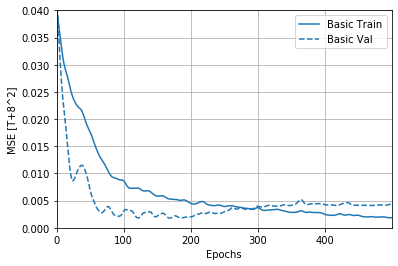

In [30]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.04])
plt.ylabel('MSE [T+8^2]')

# Results

In [31]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set MSE: {:5.10f} T+8".format(mse))

68/68 - 0s - loss: 0.1549 - mae: 0.1211 - mse: 0.0252
Testing set MSE: 0.0252225939 T+8


# Making Predictions

## scatter plot to test predictions

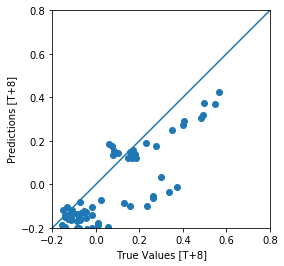

In [32]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [T+8]')
plt.ylabel('Predictions [T+8]')
lims = [-0.2, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## Actual (blue) vs Model (orange) on training data 

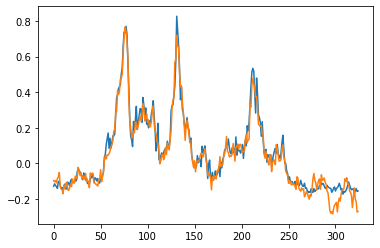

In [33]:
plt.plot(train_labels)
plt.plot(model.predict(normed_train_data).flatten())

## Actual (blue) vs Model (orange) on test data

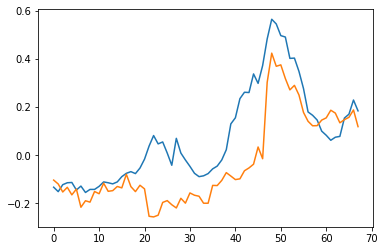

In [34]:
plt.plot(test_labels)
plt.plot(test_predictions)

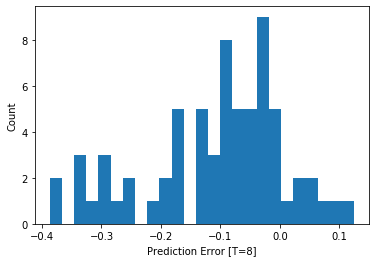

In [35]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [T=8]")
_ = plt.ylabel("Count")

## Lagged Correlation plot

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.47131887, 0.5011672 , 0.5393666 , 0.5896271 , 0.65669537,
        0.71525276, 0.77188444, 0.83360004, 0.8933693 , 0.9508434 ,
        1.        , 0.9508434 , 0.8933693 , 0.83360004, 0.77188444,
        0.71525276, 0.65669537, 0.5896271 , 0.5393666 , 0.5011672 ,
        0.47131887], dtype=float32),
 <matplotlib.lines.Line2D at 0x28b0d811488>)

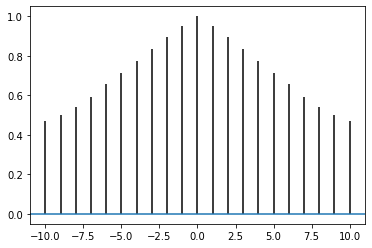

In [36]:
plt.acorr(test_predictions)